In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import string
from collections import Counter
import re
import contractions
import spacy
import nltk
from nltk.corpus import words, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from wordcloud import WordCloud
import textstat
from tqdm import tqdm
tqdm.pandas()

In [2]:
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [3]:
sp = spacy.load('en_core_web_sm')

In [4]:
ENGLISH_WORDS = set(w.lower() for w in words.words())
STOP_WORDS = set(w for w in stopwords.words('english'))

In [5]:
data = pd.read_csv('data/fulltext_preprocessed_data.csv')
data.head()

,full_text,full_tokens,full_text_lemmatized,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,"['house', 'aide', 'even', 'see', 'letter', 'ja...",house aide even see letter jason house aide ev...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...","['hillary', 'clinton', 'big', 'woman', 'campus...",hillary clinton big woman campus ever get feel...,0
2,Why the Truth Might Get You Fired Why the Trut...,"['truth', 'might', 'get', 'fired', 'truth', 'm...",truth might get fired truth might get fired oc...,1
3,15 Civilians Killed In Single US Airstrike Hav...,"['single', 'single', 'rate', 'american', 'high...",single single rate american higher engaged act...,1
4,Iranian woman jailed for fictional unpublished...,"['iranian', 'woman', 'fictional', 'unpublished...",iranian woman fictional unpublished story woma...,1


In [6]:
data.shape

(20546, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20546 entries, 0 to 20545
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   full_text             20546 non-null  object
 1   full_tokens           20546 non-null  object
 2   full_text_lemmatized  20546 non-null  object
 3   label                 20546 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 642.2+ KB


In [8]:
data['full_tokens'] = data['full_tokens'].apply(ast.literal_eval)

# Exploratory Analysis

## Class Distribution

In [37]:
label_counts = data['label'].value_counts()
label_counts

label
0    10387
1    10159
Name: count, dtype: int64

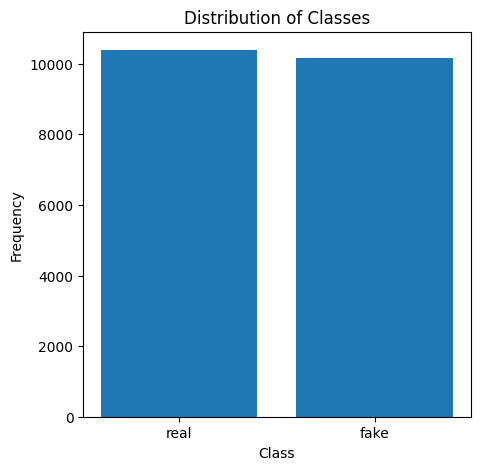

In [39]:
plt.figure(figsize=(5,5))
plt.bar(['real','fake'], label_counts.values)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of Classes")
plt.show()

* The dataset is balanced.

## Top n-grams

In [9]:
# list(nltk.ngrams(data['tokens'][0],2))

In [10]:
def get_top_ngrams(tokens_series, n=1, topk=25):
    c = Counter()
    for tokens in tokens_series:
        for ngram in ngrams(tokens,n):
            c[(' '.join(ngram)).strip()] += 1
    return c.most_common(topk)

In [11]:
print("Top 25 Unigrams:")
print(get_top_ngrams(data['full_tokens']))

Top 25 Unigrams:
[('said', 79789), ('trump', 59291), ('would', 41364), ('one', 38466), ('time', 36655), ('new', 36525), ('people', 36277), ('clinton', 28052), ('like', 26262), ('president', 25353), ('also', 25144), ('could', 20555), ('state', 20288), ('many', 19121), ('even', 18851), ('day', 18126), ('two', 17432), ('first', 17399), ('government', 16304), ('american', 16035), ('world', 15996), ('hillary', 15748), ('year', 15520), ('news', 15188), ('last', 15155)]


In [12]:
print("Top 25 Bigrams:")
print(get_top_ngrams(data['full_tokens'], n=2))

Top 25 Bigrams:
[('new york', 14534), ('donald trump', 10100), ('hillary clinton', 8866), ('york time', 8647), ('white house', 6200), ('mr clinton', 4348), ('last year', 3389), ('president trump', 2712), ('islamic state', 2368), ('last week', 2364), ('national security', 2051), ('said would', 2033), ('trump said', 2001), ('clinton campaign', 1952), ('social medium', 1925), ('secretary state', 1911), ('law enforcement', 1870), ('supreme court', 1805), ('prime minister', 1739), ('health care', 1631), ('attorney general', 1610), ('fox news', 1563), ('wall street', 1558), ('trump administration', 1555), ('bill clinton', 1534)]


In [13]:
print("Top 25 Trigrams:")
print(get_top_ngrams(data['full_tokens'], n=3))

Top 25 Trigrams:
[('new york time', 8645), ('president donald trump', 1242), ('new york city', 987), ('york time washington', 692), ('affordable care act', 621), ('dakota access pipeline', 431), ('wall street journal', 420), ('national security adviser', 402), ('democratic national committee', 379), ('hillary clinton campaign', 360), ('president george bush', 336), ('president bill clinton', 336), ('trump white house', 318), ('department homeland security', 307), ('south china sea', 299), ('briefing posted eastern', 296), ('white house press', 291), ('standing rock sioux', 268), ('make america great', 261), ('former secretary state', 260), ('investigation hillary clinton', 256), ('follow pam key', 238), ('pam key twitter', 238), ('trump hillary clinton', 237), ('russian president vladimir', 230)]


In [14]:
print("Top 25 Unigrams in Real News:")
print(get_top_ngrams(data['full_tokens'][data['label']==0]))

Top 25 Unigrams in Real News:
[('said', 68201), ('trump', 38285), ('new', 25966), ('would', 25310), ('time', 24144), ('one', 22639), ('people', 20035), ('president', 17006), ('like', 16098), ('also', 15530), ('could', 12672), ('york', 12544), ('state', 11685), ('two', 11456), ('many', 11307), ('first', 11132), ('last', 10901), ('day', 10787), ('year', 10280), ('united', 10165), ('even', 10130), ('news', 9619), ('american', 9188), ('government', 8706), ('house', 8558)]


In [15]:
print("Top 25 Bigrams in Real News:")
print(get_top_ngrams(data['full_tokens'][data['label']==0], n=2))

Top 25 Bigrams in Real News:
[('new york', 12506), ('york time', 7891), ('donald trump', 5073), ('white house', 4054), ('mr clinton', 4008), ('last year', 2861), ('president trump', 2483), ('islamic state', 2020), ('hillary clinton', 1952), ('last week', 1798), ('said would', 1724), ('trump said', 1700), ('trump administration', 1389), ('national security', 1378), ('social medium', 1336), ('health care', 1327), ('supreme court', 1306), ('prime minister', 1212), ('president donald', 1190), ('said statement', 1152), ('attorney general', 1148), ('last month', 1146), ('european union', 1101), ('chief executive', 1068), ('law enforcement', 1066)]


In [16]:
print("Top 25 Trigrams in Real News:")
print(get_top_ngrams(data['full_tokens'][data['label']==0], n=3))

Top 25 Trigrams in Real News:
[('new york time', 7890), ('president donald trump', 1185), ('new york city', 780), ('york time washington', 637), ('affordable care act', 536), ('national security adviser', 354), ('briefing posted eastern', 296), ('white house press', 269), ('department homeland security', 263), ('president george bush', 256), ('follow pam key', 238), ('pam key twitter', 238), ('trump white house', 235), ('trump executive order', 221), ('wall street journal', 208), ('briefing new york', 203), ('democratic national committee', 201), ('mr clinton said', 198), ('south china sea', 197), ('house press secretary', 196), ('said news conference', 185), ('national security council', 180), ('trump new york', 175), ('time donald trump', 173), ('like want see', 167)]


In [17]:
print("Top 25 Unigrams in Fake News:")
print(get_top_ngrams(data['full_tokens'][data['label']==1]))

Top 25 Unigrams in Fake News:
[('trump', 21006), ('clinton', 19632), ('people', 16242), ('would', 16054), ('one', 15827), ('hillary', 13443), ('time', 12511), ('said', 11588), ('new', 10559), ('like', 10164), ('also', 9614), ('world', 9144), ('even', 8721), ('state', 8603), ('president', 8347), ('election', 8329), ('could', 7883), ('many', 7814), ('government', 7598), ('war', 7532), ('day', 7339), ('american', 6847), ('russia', 6793), ('medium', 6691), ('way', 6405)]


In [18]:
print("Top 25 Bigrams in Fake News:")
print(get_top_ngrams(data['full_tokens'][data['label']==1], n=2))

Top 25 Bigrams in Fake News:
[('hillary clinton', 6914), ('donald trump', 5027), ('white house', 2146), ('new york', 2028), ('clinton campaign', 1445), ('clinton foundation', 1183), ('secretary state', 1120), ('bill clinton', 1119), ('american people', 951), ('foreign policy', 945), ('year old', 930), ('wall street', 858), ('middle east', 815), ('law enforcement', 804), ('presidential election', 799), ('york time', 756), ('world war', 750), ('state department', 724), ('election day', 712), ('democratic party', 692), ('national security', 673), ('standing rock', 641), ('washington post', 624), ('even though', 610), ('john podesta', 608)]


In [19]:
print("Top 25 Trigrams in Fake News:")
print(get_top_ngrams(data['full_tokens'][data['label']==1], n=3))

Top 25 Trigrams in Fake News:
[('new york time', 755), ('dakota access pipeline', 392), ('hillary clinton campaign', 271), ('investigation hillary clinton', 236), ('standing rock sioux', 219), ('new world order', 216), ('wall street journal', 212), ('new york city', 207), ('nominee donald trump', 191), ('former secretary state', 181), ('nominee hillary clinton', 179), ('democratic national committee', 178), ('president bill clinton', 170), ('would look like', 161), ('president elect trump', 156), ('campaign placement source', 156), ('placement source medium', 156), ('source medium content', 156), ('medium content brain', 156), ('content brain force', 156), ('elect donald trump', 153), ('russian president vladimir', 150), ('clinton private server', 150), ('trump hillary clinton', 149), ('president elect donald', 145)]


## Word Cloud

In [20]:
real_news = data['full_text_lemmatized'][data['label']==0]
fake_news = data['full_text_lemmatized'][data['label']==1]

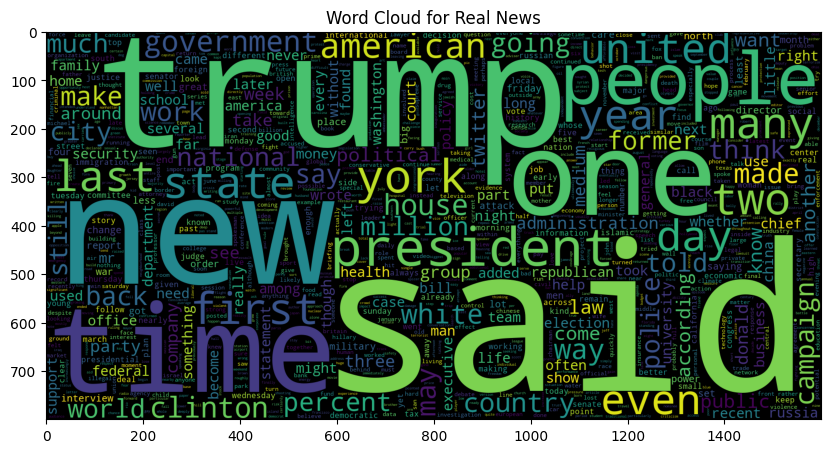

In [21]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(real_news))
plt.title("Word Cloud for Real News")
plt.imshow(wc)
plt.show()

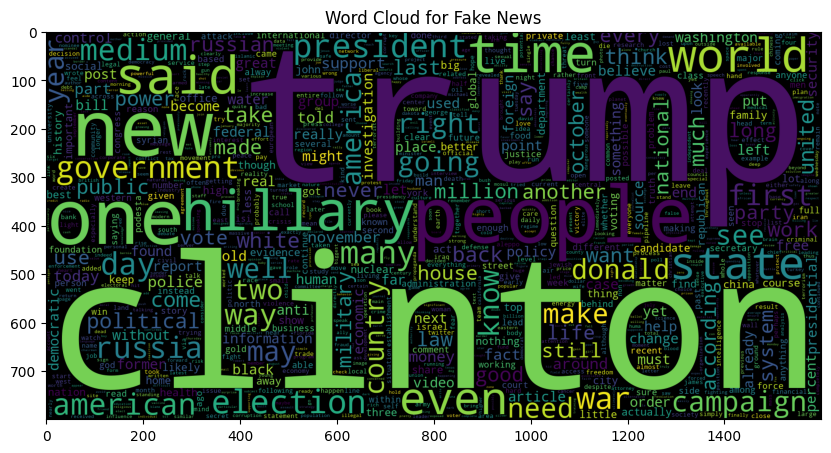

In [22]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(fake_news))
plt.title("Word Cloud for Fake News")
plt.imshow(wc)
plt.show()

## Stylometric & POS Analysis

In [9]:
def fix_contractions_safe(s):
  try:
    return contractions.fix(s)
  except:
    return s
def light_clean_text(s):
    s = str(s)
    print(s[:10])
    # normalizing quotations
    quote_maps = {'“':'"', '”':'"', "‘":"'", "’":"'"}
    for curly_quote,quote in quote_maps.items():
        s = s.replace(curly_quote, quote)
    # remove non-ASCII
    s = re.sub(r'[^\x00-\x7F]+', ' ', s)
    # fixing contractions
    s = fix_contractions_safe(s)
    # removing unnecessary whitespaces, newlines, tabspaces, etc.
    s = re.sub(r'\s+', ' ', s).strip()
    return s

In [34]:
def extract_style_features(s):
    print(s[:10])
    s = light_clean_text(s)
    doc = sp(s)
    words = [t.text for t in doc if t.is_alpha]
    sentences = list(doc.sents)
    num_chars = len(s)
    num_words = len(words)
    
    # surface-level features
    avg_word_len = np.mean([len(word) for word in words]) if words else 0
    avg_sent_len = np.mean([len(sentence) for sentence in sentences]) if sentences else 0
    vocab_richness = len(set(words))/num_words if words else 0
    url_pattern = re.compile(r'(https?:\/\/)?([\w\.-]+)\.([A-Za-z\.]{2,6})([\/\w \.-]*)*\/?')
    url_ratio = len(url_pattern.findall(s))/num_words if words else 0
    
    # character-level 
    all_caps_ratio = sum(1 for w in words if w.isupper())/num_words if words else 0
    exclamations_ratio = s.count('!')/num_chars if s else 0
    questions_ratio = s.count('?')/num_chars if s else 0
    digits_ratio = sum(1 for c in s if c.isdigit())/num_chars if s else 0
    punctuation_ratio = sum(1 for c in s if c in string.punctuation)/num_chars if s else 0
    
    # readability score (is the content accessible, engaging, of good quality, etc.)
    flesch_score = textstat.flesch_reading_ease(s)

    # POS ratios
    pos_counts = {}
    for token in doc:
        if token.is_alpha:
            pos_counts[token.pos_] = pos_counts.get(token.pos_, 0) + 1
    total = sum(pos_counts.values())
    print(total)
    noun_ratio = pos_counts.get('NOUN', 0)/num_words if words else 0
    verb_ratio = pos_counts.get('VERB', 0)/num_words if words else 0
    adjective_ratio = pos_counts.get('ADJ', 0)/num_words if words else 0
    adverb_ratio = pos_counts.get('ADV', 0)/num_words if words else 0
    pronoun_ratio = pos_counts.get('PRON', 0)/num_words if words else 0
    proper_noun_ratio = pos_counts.get('PROPN', 0)/num_words if words else 0

    return {
        'average_word_length':avg_word_len,
        'average_sentence_length':avg_sent_len,
        'vocabulary_richness':vocab_richness,
        'url_ratio':url_ratio,
        'all_caps_ratio':all_caps_ratio,
        'exclamations_ratio':exclamations_ratio,
        'questions_ratio':questions_ratio,
        'digits_ratio':digits_ratio,
        'flesch_reading_ease_score': flesch_score,
        'noun_ratio':noun_ratio,
        'verb_ratio':verb_ratio,
        'adjective_ratio':adjective_ratio,
        'adverb_ratio':adverb_ratio,
        'pronoun_ratio':pronoun_ratio,
        'proper_noun_ratio':proper_noun_ratio,
        'punctuation_ratio':punctuation_ratio
    }

In [ ]:
style_features = data['full_text'].progress_apply(extract_style_features)

In [ ]:
style_df = pd.DataFrame(list(style_features))

In [26]:
style_df['label'] = data['label'].values

In [27]:
style_df.head(10)

,average_word_length,average_sentence_length,vocabulary_richness,url_ratio,all_caps_ratio,exclamations_ratio,questions_ratio,digits_ratio,flesch_reading_ease_score,noun_ratio,verb_ratio,adjective_ratio,adverb_ratio,pronoun_ratio,proper_noun_ratio,punctuation_ratio,label
0,4.737278,25.131579,0.463905,0.000000,0.011834,0.000000,0.000000,0.004387,48.159824,0.136095,0.126627,0.057988,0.057988,0.102959,0.165680,0.020738,1
1,4.747504,25.030303,0.543509,0.000000,0.009986,0.000000,0.000954,0.007393,54.114539,0.194009,0.119829,0.064194,0.052782,0.111270,0.102710,0.027427,0
2,4.934295,25.224138,0.469551,0.006410,0.006410,0.000000,0.000519,0.002986,45.803364,0.196314,0.111378,0.085737,0.048878,0.081731,0.103365,0.028171,1
3,4.732852,23.222222,0.453069,0.001805,0.034296,0.000000,0.000000,0.009747,52.086600,0.209386,0.120939,0.075812,0.027076,0.050542,0.124549,0.018276,1
4,5.104294,37.600000,0.595092,0.000000,0.000000,0.000000,0.000000,0.005848,27.212727,0.257669,0.153374,0.049080,0.012270,0.067485,0.092025,0.021442,1
5,4.586667,13.285714,0.595556,0.000000,0.004444,0.000752,0.000000,0.000000,72.094324,0.133333,0.151111,0.040000,0.026667,0.111111,0.168889,0.040602,0
6,4.409091,21.555556,0.584980,0.000000,0.005929,0.000352,0.000704,0.007040,58.879123,0.219368,0.124506,0.043478,0.053360,0.067194,0.118577,0.022879,1
7,4.883085,28.969697,0.500000,0.000000,0.003731,0.000000,0.000000,0.005620,49.561458,0.206468,0.126866,0.099502,0.044776,0.072139,0.098259,0.027700,0
8,4.596247,21.052632,0.371091,0.000000,0.009034,0.000000,0.000847,0.002298,54.555643,0.178596,0.138290,0.076442,0.032662,0.123002,0.067408,0.018624,0
9,4.896996,25.240506,0.396689,0.000000,0.006744,0.000097,0.000291,0.004070,54.581724,0.191294,0.132434,0.076027,0.026977,0.064378,0.137952,0.033818,0


In [28]:
style_df.to_csv('data/style_features.csv', index=False)

### Visualization

In [29]:
len(style_df.columns)

17

In [30]:
style_df.describe()

,average_word_length,average_sentence_length,vocabulary_richness,url_ratio,all_caps_ratio,exclamations_ratio,questions_ratio,digits_ratio,flesch_reading_ease_score,noun_ratio,verb_ratio,adjective_ratio,adverb_ratio,pronoun_ratio,proper_noun_ratio,punctuation_ratio,label
count,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000,20546.000000
mean,4.832301,24.844484,0.547908,0.002634,0.021003,0.000345,0.000410,0.007478,49.796856,0.195179,0.124245,0.068495,0.038444,0.072207,0.148339,0.030325,0.494451
std,0.356979,8.280382,0.130519,0.015496,0.045644,0.002753,0.001502,0.012991,16.421835,0.044238,0.028879,0.027366,0.019881,0.036598,0.111341,0.021791,0.499981
min,2.500000,1.000000,0.123817,0.000000,0.000000,0.000000,0.000000,0.000000,-512.267192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.632088,20.634091,0.460328,0.000000,0.005281,0.000000,0.000000,0.002128,42.228154,0.172757,0.112532,0.055263,0.027738,0.048855,0.092615,0.023690,0.000000
50%,4.837980,24.562500,0.522932,0.000000,0.011734,0.000000,0.000000,0.004797,50.440381,0.197568,0.125565,0.068702,0.037449,0.068626,0.125157,0.027745,0.000000
75%,5.030653,28.467103,0.605678,0.000931,0.023305,0.000000,0.000387,0.008648,58.620261,0.221014,0.138462,0.081645,0.047767,0.091743,0.169439,0.032443,1.000000
max,10.000000,174.000000,1.000000,0.666667,1.000000,0.166667,0.083333,0.342105,121.220000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,0.481271,1.000000


In [31]:
cols = list(style_df.columns)
cols.remove('label')

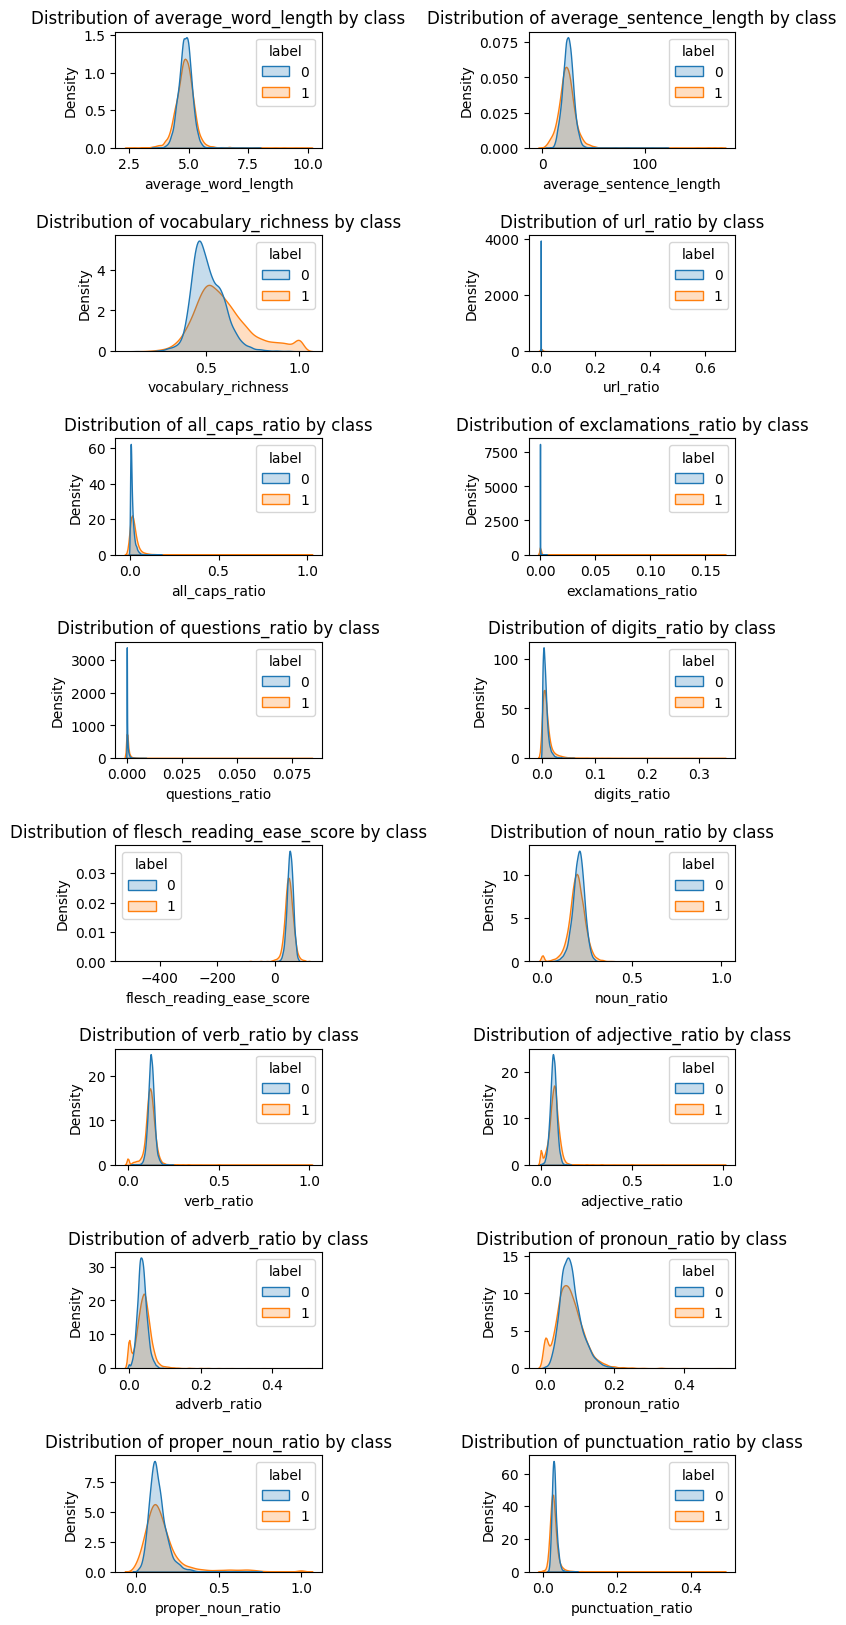

In [32]:
fig,ax = plt.subplots(8,2,figsize=(8,20))
ax = ax.flatten()
for i, col in enumerate(cols):
    sns.kdeplot(data=style_df, x=col, hue='label', 
                fill=True, common_norm=False, ax=ax[i])
    ax[i].set_title(f"Distribution of {col} by class")
plt.subplots_adjust(wspace=1,hspace=0.75)
plt.show()

* Most distributions are overlapping for the two classes, which indicates that these stylometric features are not very good differentiators for them.
* However, a slightly higher variance is consistently observed in all the distributions for the fake class than real class. This difference in variance is most pronounced for vocabulary richness, making it the strongest signal for detecting fake news, distantly followed by pronoun ratio and then proper-noun ratio.
* URL ratios, exclamation ratios, and question ratios are densely distributed around 0 for both fake and real labels. The same is nearly true for all-caps ratio but there is slightly higher variance for fake than real indicating that this ratio could partly assist in classifying. A similar but much more subtle variance can be observed for fake class in exclamation and question ratios as well.